In [16]:
import pandas as pd
import numpy as np
import datetime
import datetime as dt
import pytz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [17]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/louisaliparisa/Desktop


In [18]:
def dateparse(time_in_secs):
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

path = working_directory + '/data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'
bitcoin1 = pd.read_csv(path, parse_dates=[0], date_parser=dateparse)

In [19]:
bitcoin1.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 02:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 02:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 02:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 02:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
bitcoin = bitcoin1.dropna().reset_index(drop=True)
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 10:50:00+00:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 11:59:00+00:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 12:00:00+00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2011-12-31 23:16:00+00:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,2021-03-30 19:56:00+00:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 19:57:00+00:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 19:58:00+00:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 19:59:00+00:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [21]:
bitcoin['Timestamp'] = bitcoin['Timestamp'].dt.tz_localize(None)
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 10:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,2011-12-31 11:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,2011-12-31 12:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,2011-12-31 23:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
3613764,2021-03-30 19:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
3613765,2021-03-30 19:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
3613766,2021-03-30 19:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
3613767,2021-03-30 19:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [22]:
bitcoin = bitcoin.groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
bitcoin

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2012-01-01,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2,2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
3,2012-01-03,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
4,2012-01-04,4.93,4.93,4.93,4.93,9.680000,47.722400,4.930000
...,...,...,...,...,...,...,...,...
3373,2021-03-26,52449.23,52537.81,52449.23,52527.35,2.742287,143985.370640,52505.587896
3374,2021-03-27,54821.66,54856.01,54821.66,54856.01,0.261643,14346.416748,54832.004555
3375,2021-03-28,56095.81,56158.59,56095.81,56149.01,0.898928,50459.981106,56133.517533
3376,2021-03-29,55361.25,55417.15,55361.25,55401.67,1.314104,72804.822995,55402.653850


In [23]:
bitcoin = bitcoin.set_index('Timestamp')

In [24]:
bitcoinx = bitcoin[['Close']]
bitcoinx

,Close
Timestamp,
2011-12-31,4.39
2012-01-01,4.84
2012-01-02,5.00
2012-01-03,5.32
2012-01-04,4.93
...,...
2021-03-26,52527.35
2021-03-27,54856.01
2021-03-28,56149.01


In [25]:
bitcoinx['Close'] = bitcoinx['Close'].fillna(method='ffill')

<ipython-input-25-8db6d492bfdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoinx['Close'] = bitcoinx['Close'].fillna(method='ffill')


In [26]:
bitcoinx.index = pd.to_datetime(bitcoinx.index)

In [12]:
#print(bitcoin.head(20))


splitdate = '2018-12-17'
predate = '2020-04-01'
bitcoin_train = bitcoinx.loc[bitcoinx.index > splitdate]
bitcoin_train = bitcoin_train.loc[bitcoin_train.index <= predate]
bitcoin_test = bitcoinx.loc[bitcoinx.index > predate]
#bitcoin_test = bitcoin_test.loc[bitcoin_test.index < '2020-04-25']

In [13]:
bitcoin_train = bitcoin_train.reset_index()
bitcoin_trainx = bitcoin_train[['Timestamp']]
bitcoin_trainx['Timestamp'] = pd.to_datetime(bitcoin_trainx['Timestamp'])
bitcoin_trainx['Timestamp']=bitcoin_trainx['Timestamp'].map(dt.datetime.toordinal)
bitcoin_trainx

<ipython-input-13-44349ceef573>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_trainx['Timestamp'] = pd.to_datetime(bitcoin_trainx['Timestamp'])
<ipython-input-13-44349ceef573>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_trainx['Timestamp']=bitcoin_trainx['Timestamp'].map(dt.datetime.toordinal)


,Timestamp
0,737046
1,737047
2,737048
3,737049
4,737050
...,...
466,737512
467,737513
468,737514
469,737515


In [14]:
bitcoin_trainy = bitcoin_train[['Close']]
bitcoin_trainy

,Close
0,3517.74
1,3715.25
2,3736.95
3,4017.46
4,3807.18
...,...
466,6109.16
467,6209.34
468,6017.46
469,6435.00


In [15]:
bitcoin_test= bitcoin_test.reset_index()

bitcoin_test

,Timestamp,Close
0,2020-04-02,6626.56
1,2020-04-03,6783.30
2,2020-04-04,6697.55
3,2020-04-05,6785.86
4,2020-04-06,6864.44
...,...,...
358,2021-03-26,52527.35
359,2021-03-27,54856.01
360,2021-03-28,56149.01
361,2021-03-29,55401.67


In [16]:
bitcoin_testx = bitcoin_test[['Timestamp']]
bitcoin_testx['Timestamp'] = pd.to_datetime(bitcoin_testx['Timestamp'])
bitcoin_testx['Timestamp']=bitcoin_testx['Timestamp'].map(dt.datetime.toordinal)
bitcoin_testx

<ipython-input-16-f3d0816fa189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_testx['Timestamp'] = pd.to_datetime(bitcoin_testx['Timestamp'])
<ipython-input-16-f3d0816fa189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_testx['Timestamp']=bitcoin_testx['Timestamp'].map(dt.datetime.toordinal)


,Timestamp
0,737517
1,737518
2,737519
3,737520
4,737521
...,...
358,737875
359,737876
360,737877
361,737878


In [17]:
bitcoin_testy = bitcoin_test[['Close']]
bitcoin_testy

,Close
0,6626.56
1,6783.30
2,6697.55
3,6785.86
4,6864.44
...,...
358,52527.35
359,54856.01
360,56149.01
361,55401.67


# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg = reg.fit(bitcoin_trainx,bitcoin_trainy)

In [21]:
bitcoin_predy = reg.predict(bitcoin_testx)

In [22]:
print("linear regression: ", mean_squared_log_error(bitcoin_test['Close'], bitcoin_predy))

linear regression:  0.4016838940072041


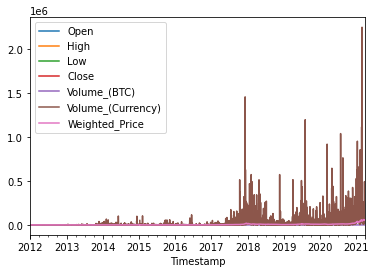

In [23]:
bitcoin.plot()

# Support Vector Machine

In [24]:
print(bitcoinx)

               Close
Timestamp           
2011-12-31      4.39
2012-01-01      4.84
2012-01-02      5.00
2012-01-03      5.32
2012-01-04      4.93
...              ...
2021-03-26  52527.35
2021-03-27  54856.01
2021-03-28  56149.01
2021-03-29  55401.67
2021-03-30  57051.13

[3378 rows x 1 columns]


In [25]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 
#n = 30 days

#Create another column (the target or dependent variable) shifted 'n' units up
bitcoinx['Prediction'] = bitcoinx[['Close']].shift(-prediction_days)

<ipython-input-25-8fe9d60001c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoinx['Prediction'] = bitcoinx[['Close']].shift(-prediction_days)


In [26]:
bitcoinx.head()


,Close,Prediction
Timestamp,,
2011-12-31,4.39,5.30
2012-01-01,4.84,5.70
2012-01-02,5.00,5.52
2012-01-03,5.32,6.16
2012-01-04,4.93,6.00


In [27]:
bitcoinx.tail()

,Close,Prediction
Timestamp,,
2021-03-26,52527.35,NaN
2021-03-27,54856.01,NaN
2021-03-28,56149.01,NaN
2021-03-29,55401.67,NaN
2021-03-30,57051.13,NaN


In [28]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(bitcoinx.drop(['Prediction'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(bitcoin)-prediction_days]
print(X)

[[4.390000e+00]
 [4.840000e+00]
 [5.000000e+00]
 ...
 [4.719240e+04]
 [4.759500e+04]
 [4.433332e+04]]


In [29]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) 
y = np.array(bitcoinx['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = y[:-prediction_days] 
print(y)

[5.300000e+00 5.700000e+00 5.520000e+00 ... 5.614901e+04 5.540167e+04
 5.705113e+04]


In [30]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(bitcoinx.drop(['Prediction'],1))[-prediction_days:]
print(prediction_days_array)

[[46481.83]
 [49138.32]
 [49196.4 ]
 [49203.53]
 [46737.32]
 [48439.71]
 [49428.12]
 [50528.08]
 [53785.49]
 [53620.44]
 [55735.57]
 [56708.33]
 [57032.02]
 [61199.06]
 [60528.22]
 [54150.19]
 [55475.97]
 [58802.57]
 [57808.56]
 [58299.31]
 [57778.8 ]
 [57637.17]
 [54638.56]
 [54279.85]
 [52050.  ]
 [52527.35]
 [54856.01]
 [56149.01]
 [55401.67]
 [57051.13]]


In [32]:
from sklearn.svm import SVR

In [33]:
# Create and train the Support Vector Machine 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)#Create the model


In [34]:
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=1000.0, gamma=1e-05)

In [35]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.48698008129732795


In [36]:
# Print the predicted value
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

print()

#Print the actual values
print(y_test)

[4.21983374e+02 5.98575531e+01 1.09933206e+04 9.02331985e+03
 1.42168583e+03 8.82632499e+03 1.10743812e+02 1.56174096e+02
 2.71883708e+03 2.54918622e+02 2.42910416e+02 6.19625829e+03
 1.07130636e+04 4.55272269e+03 5.93813494e+02 1.17537007e+01
 5.97330708e+02 8.39850989e+03 6.37361077e+02 8.54680794e+03
 2.31990062e+02 3.84709583e+03 1.44594092e+02 8.94027300e+02
 2.77012210e+02 1.27014119e+04 6.14196551e+03 3.80530654e+02
 9.25532785e+03 1.14077556e+04 1.09871581e+01 1.74156796e+01
 8.61535036e+03 7.77393022e+03 5.89896764e+02 1.27839669e+04
 1.07455417e+01 1.40567887e+02 3.42567353e+02 8.55344693e+03
 2.44310571e+02 9.36394384e+03 1.44178876e+02 1.85411609e+03
 7.05136026e+02 2.21716017e+02 5.97838664e+02 8.84057385e+02
 5.87436141e+02 8.40882436e+03 6.36498522e+02 1.18846490e+01
 9.28600725e+03 6.42738253e+02 2.77522038e+03 9.41956353e+03
 8.92353494e+03 4.87136168e+03 7.65608943e+03 2.85821342e+02
 5.83772089e+02 8.57466518e+02 2.61088720e+02 5.01050621e+03
 1.42117440e+04 9.420585

In [37]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)
print(svm_prediction)

[10618.97115279 11779.23269124 12070.96955734 12103.30663754
 11363.64764596 10447.09969832 12447.52243908 10818.6744466
 10325.82486394 10325.82486394 11140.11407175 11323.11325259
 10634.07997092 10325.82486394 10325.82486394 10325.82486394
 10522.94799047 10325.82486394 10325.82846307 10325.82486395
 10325.83181029 10325.94941032 10325.82507195 10325.82486395
 10326.55317665 10325.82488624 10325.85340798 10862.2329683
 10428.31780362 10595.21499385]


In [38]:
#Print the actual price for the next 'n' days, n=prediction_days=30 
bitcoinx.tail(prediction_days)

,Close,Prediction
Timestamp,,
2021-03-01,46481.83,NaN
2021-03-02,49138.32,NaN
2021-03-03,49196.40,NaN
2021-03-04,49203.53,NaN
2021-03-05,46737.32,NaN
2021-03-06,48439.71,NaN
2021-03-07,49428.12,NaN
2021-03-08,50528.08,NaN
2021-03-09,53785.49,NaN


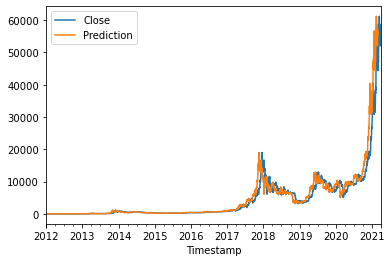

In [39]:
bitcoinx.plot()

# NN

In [27]:
bitcoin1['date'] = pd.to_datetime(bitcoin1['Timestamp'],unit='s').dt.date
group = bitcoin1.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [28]:
print(Real_Price)

date
2011-12-31        4.493282
2012-01-01        4.920000
2012-01-02        5.000000
2012-01-03        5.216667
2012-01-04        5.341343
                  ...     
2021-03-26    53714.112556
2021-03-27    55368.274704
2021-03-28    55742.179404
2021-03-29    57234.152701
2021-03-30    58548.668066
Name: Weighted_Price, Length: 3375, dtype: float64


In [30]:
prediction_days = 30
df_train= Real_Price[len(Real_Price)-prediction_days:]
df_test= Real_Price[:len(Real_Price)-prediction_days]

In [31]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [32]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [35]:
regressor = Sequential()

In [36]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [37]:
regressor.add(Dense(units = 1))

In [38]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
6/6 [==============================] - 36s 3ms/step - loss: 0.1153
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1150
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1034
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1052
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0975
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0955
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0888
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0838
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0794
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0924
Epoch 11/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0951
Epoch 12/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0655
Epoch 13/100
6/6 [==============================] - 0s 6ms/s

In [40]:
test_set = df_test.values[1:]
sc = MinMaxScaler()
# X_scaled = sc.fit_transform(X)
inputs = np.reshape(df_test.values[0:len(df_test)-1], (len(test_set), 1))
inputs = sc.fit_transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

ValueError: cannot insert level_0, already exists

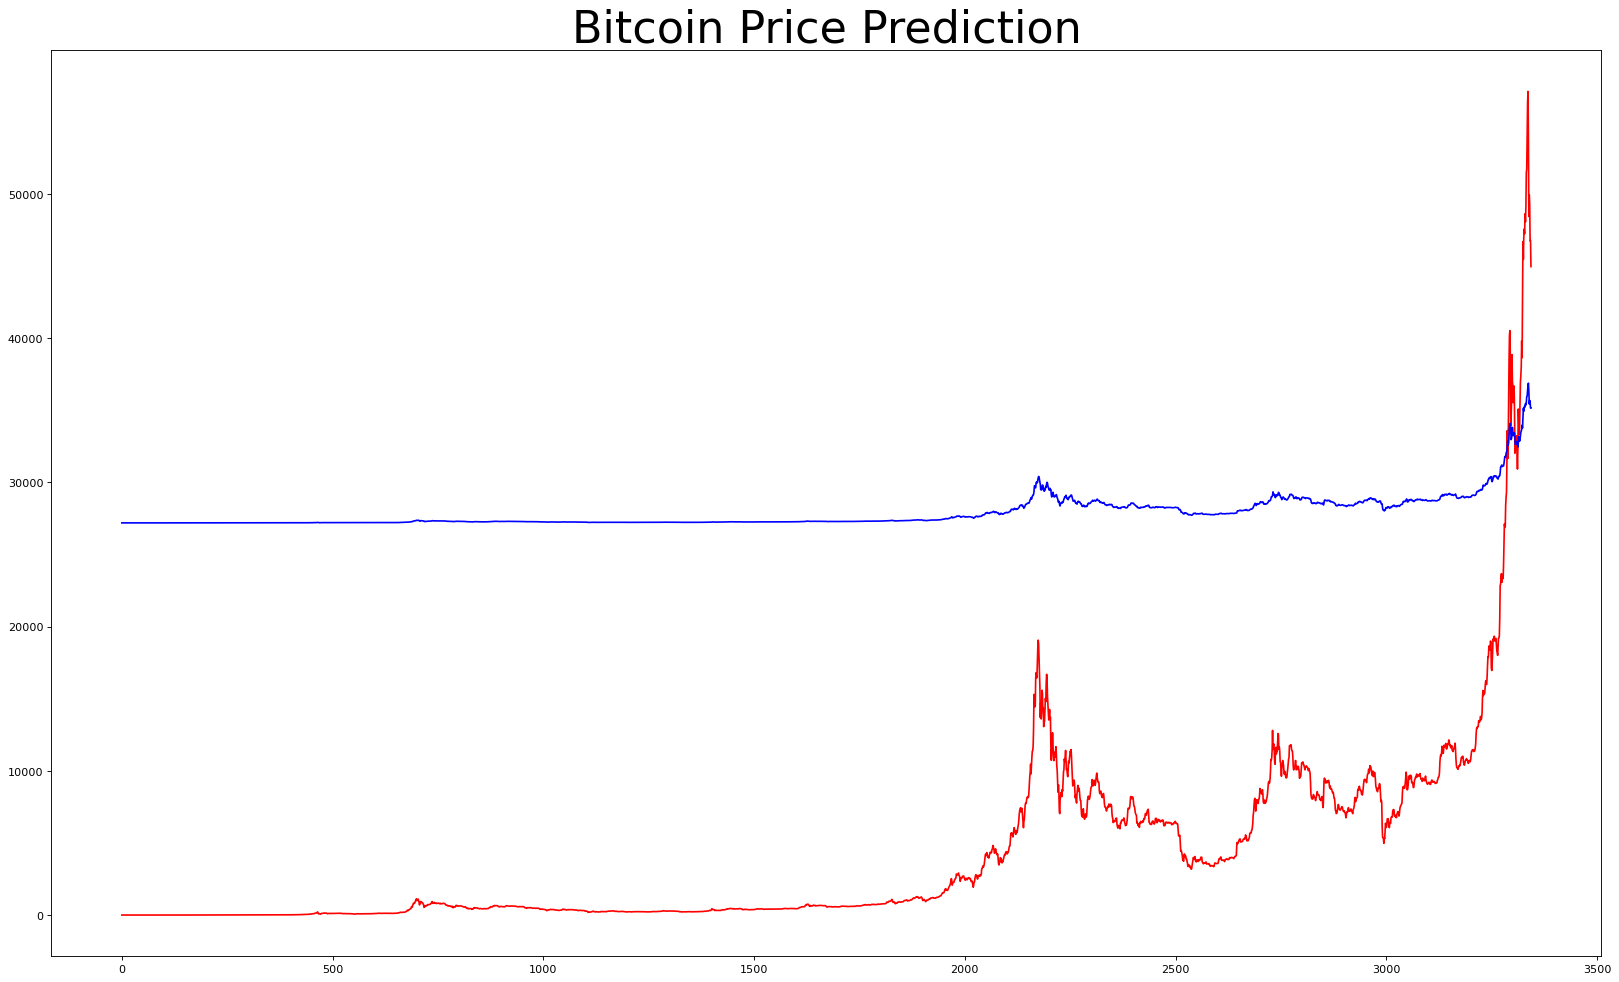

In [47]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='b')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real Bitcoin Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Bitcoin Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()